# Recommender Systems

Recommender systems try to capture these similar patterns and similar behaviors, to help predict what else you might like.
 
Applications
 * What to buy? E-Commerce, Books, Movies
 * Where to Eat? Restraunts
 * Who to be friends with? LinkedIN, Facebook
 * Personalize Experience on Web? News Platform, News Personalization
 
Advantages
 * Broader Exposure 
 * Possibility of continual usage or purchase of products
 * Provides better experience
 
2 Types of Recommender Systems 
1. Content-Based (Similar Items)
     - Show me more of the same I have liked before
     - Tries to figure out the favourite aspects of an item are among liked items
     - And then make recommendation on items that share such aspects
2. Collaborative Filtering (Similar Preferences)
     - Tell me whats popular among my neighbours, I might also like it
     - They find similar groups of users and provide recommendations based on similar tastes withi that group
  
2 types of implementing Recommender Systems
1. Memory Based
    - Use the entire user-item dataset to generate a recommendation
    - It uses statistical techniques to approximate users or items. Examples of these techniques include: Pearson Correlation, Cosine Similarity and Euclidean Distance, among others.
2. Model Based
    - a model of users is developed in an attempt to learn their preferences
    - Models can be created using Machine Learning techniques like regression, clustering, classification, and so on

### Content Based Recommender System

A Content-based recommendation system tries to recommend items to users based on their profile. The user's profile revolves around that user's preferences and tastes. It is shaped based on user ratings, including the number of times that user has clicked on different items or perhaps even liked those items. The recommendation process is based on the similarity between those items. Similarity or closeness of items is measured based on the similarity in the content of those items. When we say content, we're talking about things like the items category, tag, genre, and so on. For example, if we have four movies, and if the user likes or rates the first two items, and if Item 3 is similar to Item 1 in terms of their genre, the engine will also recommend Item 3 to the user.

Have ratings for 3 movies. want to recommend anyone of the next three, so essentially want to predict the ratings the perosn will give to the next users

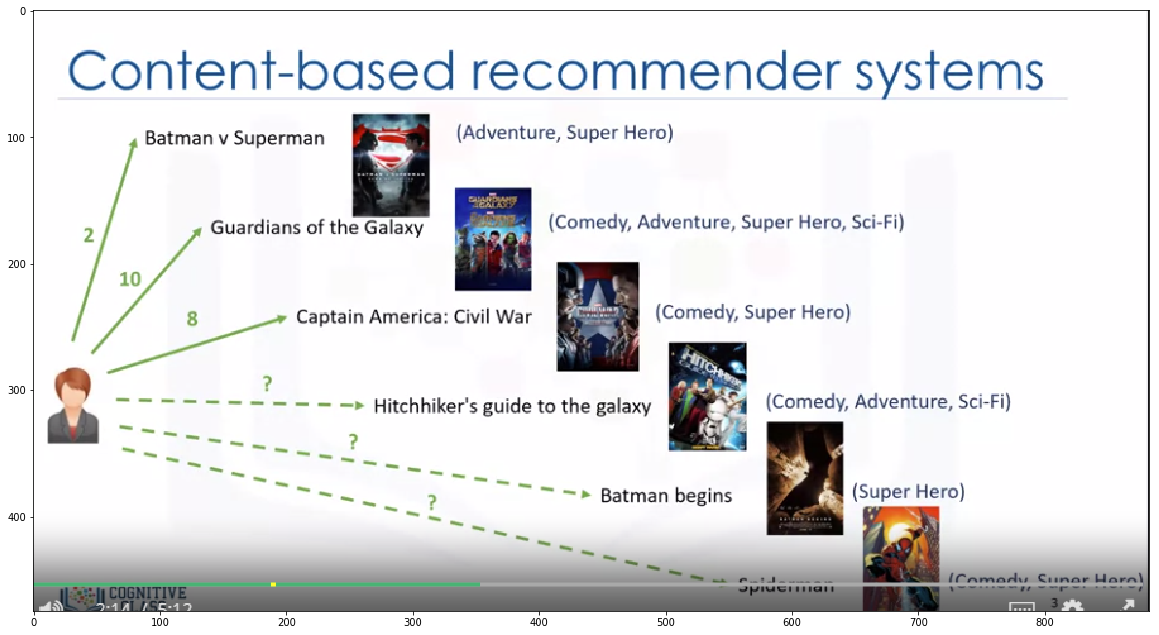

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20,12))
img = mpimg.imread('../Pictures/CBRecommender.PNG')
plt.imshow(img)

Then we create a vector of the rated movies, and create a movie matrix through one hot encoding, and multiply it by the rating matrix. This is now the Weighted genre matrix. We then add the columns and normalize alll the values to see which user profile the user fits in.

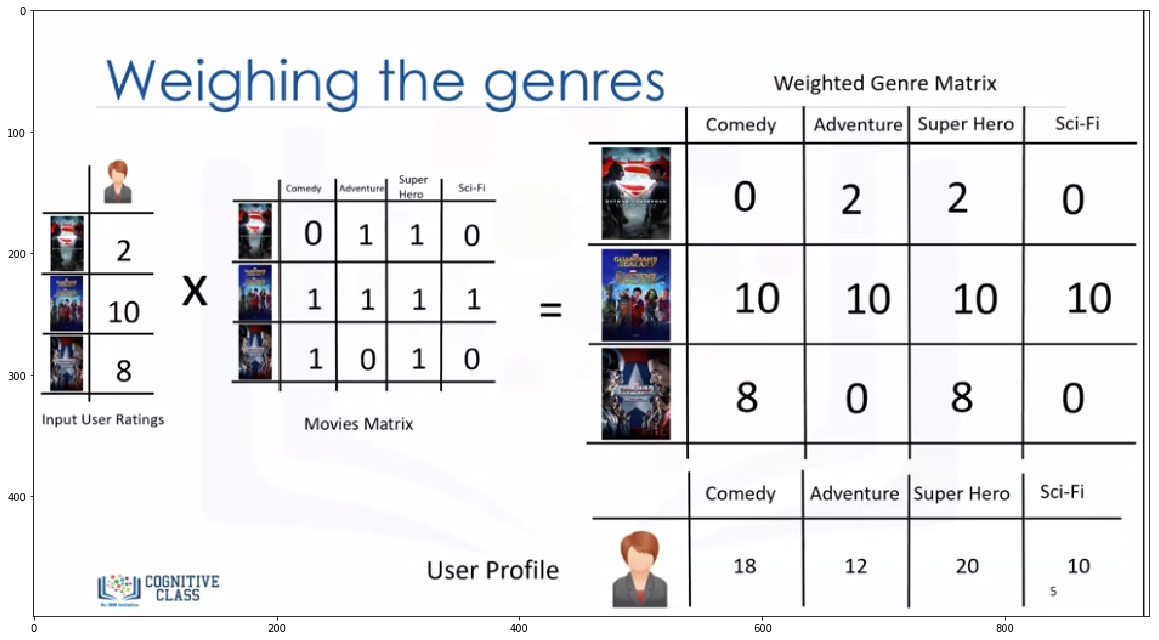

In [5]:
plt.figure(figsize=(20,12))
img = mpimg.imread('../Pictures/Onehot.PNG')
plt.imshow(img)

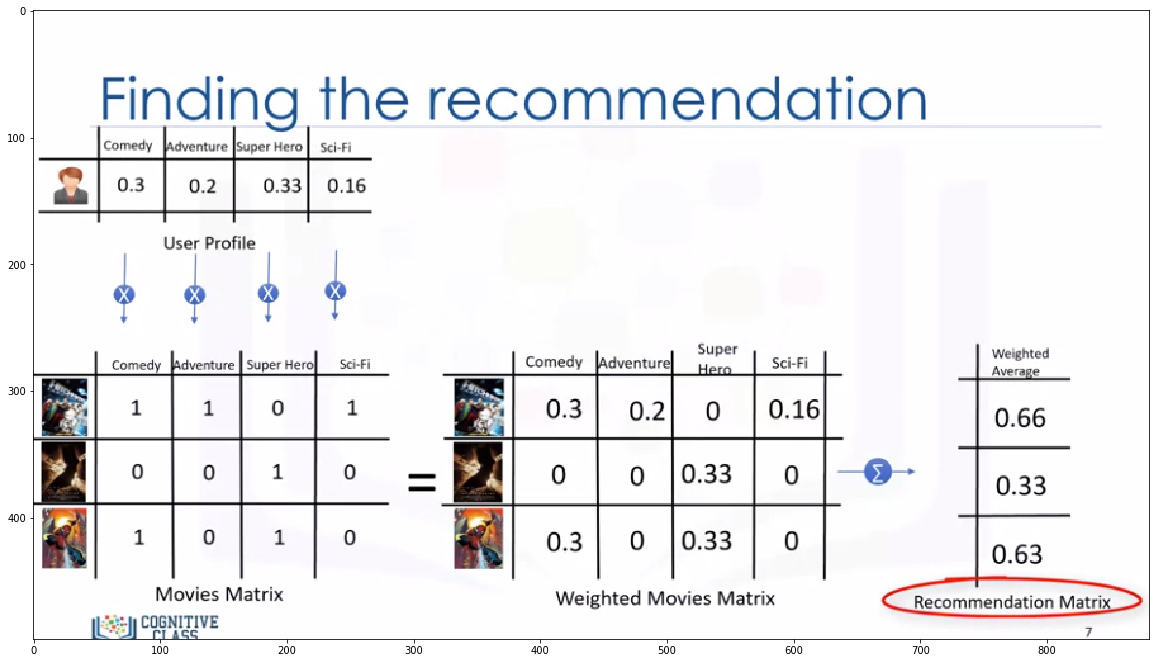

In [6]:
plt.figure(figsize=(20,12))
img = mpimg.imread('../Pictures/FindingRecommendation.PNG')
plt.imshow(img)

You create a one hot encoding matrix of the movies you havent watched and then multiply each category by the user profile rating for that category. Then you sum all categories for that particular movie and create a Recommendation matrix, the movie with the higher weighted averages are then chosen for recommendation.


It doesnt work for the case where the genre has not been watched before or has very few selections. recommender may never recommend any movie outside of the genres he has watched

In [8]:
#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#Storing the movie information into a pandas dataframe
movies_df = pd.read_csv('./Dataset/movies.csv')
#Storing the user information into a pandas dataframe
ratings_df = pd.read_csv('./Dataset/ratings.csv')
#Head is a function that gets the first N rows of a dataframe. N's default is 5.
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [20]:
#Every genre is separated by a | so we simply have to call the split function on |
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [21]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = movies_df.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies_df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [23]:
#Drop removes a specified row or column from a dataframe
ratings_df = ratings_df.drop('timestamp', 1)
ratings_df.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


In [24]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [25]:
#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
display(inputId)
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
293,296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994
1246,1274,Akira,"[Action, Adventure, Animation, Sci-Fi]",1988
1885,1968,"Breakfast Club, The","[Comedy, Drama]",1985


,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


In [26]:
#Filtering out the movies from the input
userMovies = moviesWithGenres_df[moviesWithGenres_df['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,1274,Akira,"[Action, Adventure, Animation, Sci-Fi]",1988,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1885,1968,"Breakfast Club, The","[Comedy, Drama]",1985,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop=True)
#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
userGenreTable

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
inputMovies['rating']

0    3.5
1    2.0
2    5.0
3    4.5
4    5.0
Name: rating, dtype: float64

In [29]:
#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
#The user profile
userProfile

Adventure             10.0
Animation              8.0
Children               5.5
Comedy                13.5
Fantasy                5.5
Romance                0.0
Drama                 10.0
Action                 4.5
Crime                  5.0
Thriller               5.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 4.5
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

In [30]:
#Now let's get the genres of every movie in our original dataframe
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movieId'])
#And drop the unnecessary information
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
genreTable.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
genreTable.shape

(34208, 20)

In [32]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

movieId
1    0.594406
2    0.293706
3    0.188811
4    0.328671
5    0.188811
dtype: float64

In [33]:
#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head()

movieId
5018      0.748252
26093     0.734266
27344     0.720280
148775    0.685315
6902      0.678322
dtype: float64

In [34]:
#The final recommendation table
movies_df.loc[movies_df['movieId'].isin(recommendationTable_df.head(20).keys())]

,movieId,title,genres,year
664,673,Space Jam,"[Adventure, Animation, Children, Comedy, Fanta...",1996
1824,1907,Mulan,"[Adventure, Animation, Children, Comedy, Drama...",1998
2902,2987,Who Framed Roger Rabbit?,"[Adventure, Animation, Children, Comedy, Crime...",1988
4923,5018,Motorama,"[Adventure, Comedy, Crime, Drama, Fantasy, Mys...",1991
6793,6902,Interstate 60,"[Adventure, Comedy, Drama, Fantasy, Mystery, S...",2002
8605,26093,"Wonderful World of the Brothers Grimm, The","[Adventure, Animation, Children, Comedy, Drama...",1962
8783,26340,"Twelve Tasks of Asterix, The (Les douze travau...","[Action, Adventure, Animation, Children, Comed...",1976
9296,27344,Revolutionary Girl Utena: Adolescence of Utena...,"[Action, Adventure, Animation, Comedy, Drama, ...",1999
9825,32031,Robots,"[Adventure, Animation, Children, Comedy, Fanta...",2005
11716,51632,Atlantis: Milo's Return,"[Action, Adventure, Animation, Children, Comed...",2003


#### Advantages and Disadvantages of Content-Based Filtering

##### Advantages
* Learns user's preferences
* Highly personalized for the user

##### Disadvantages
* Doesn't take into account what others think of the item, so low quality item recommendations might happen
* Extracting data is not always intuitive
* Determining what characteristics of the item the user dislikes or likes is not always obvious

### Collaborative Filtering
2 Types of Collaborative Filtering
1. User-Based Collaborative Filtering
    - Based on the user's similarity or neighbourhood
    - Look at users that share the same likes and even the same rating pattern
2. Item-Based Collborative Filtering
    - Based on item's similarity

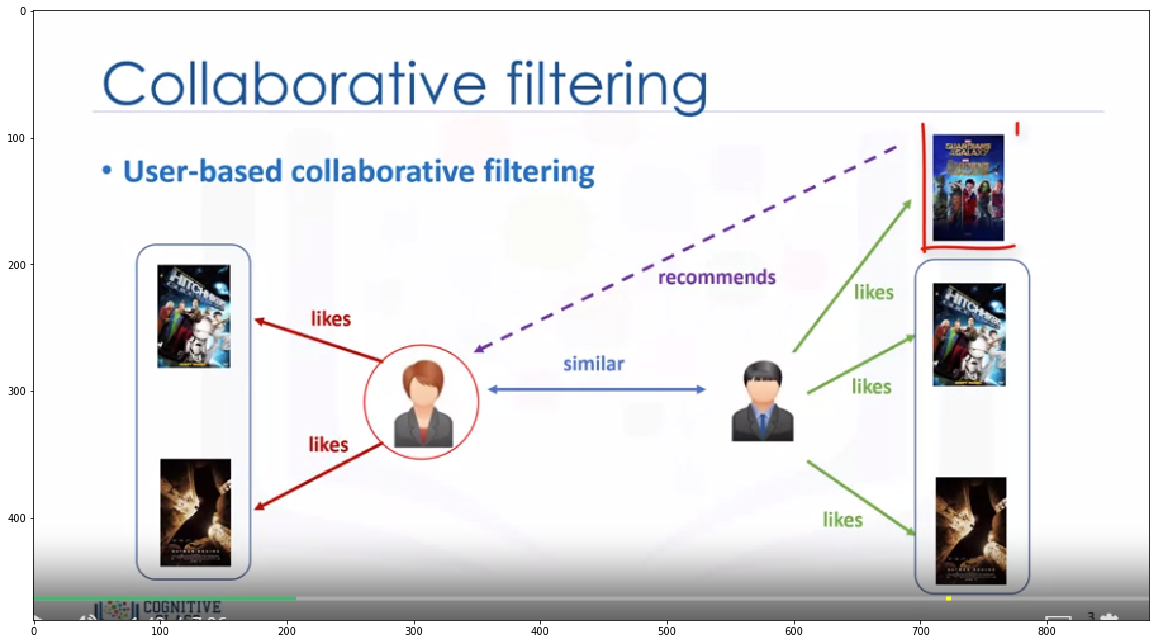

In [35]:
plt.figure(figsize=(20,12))
img = mpimg.imread('../Pictures/CollabFiltering.PNG')
plt.imshow(img)

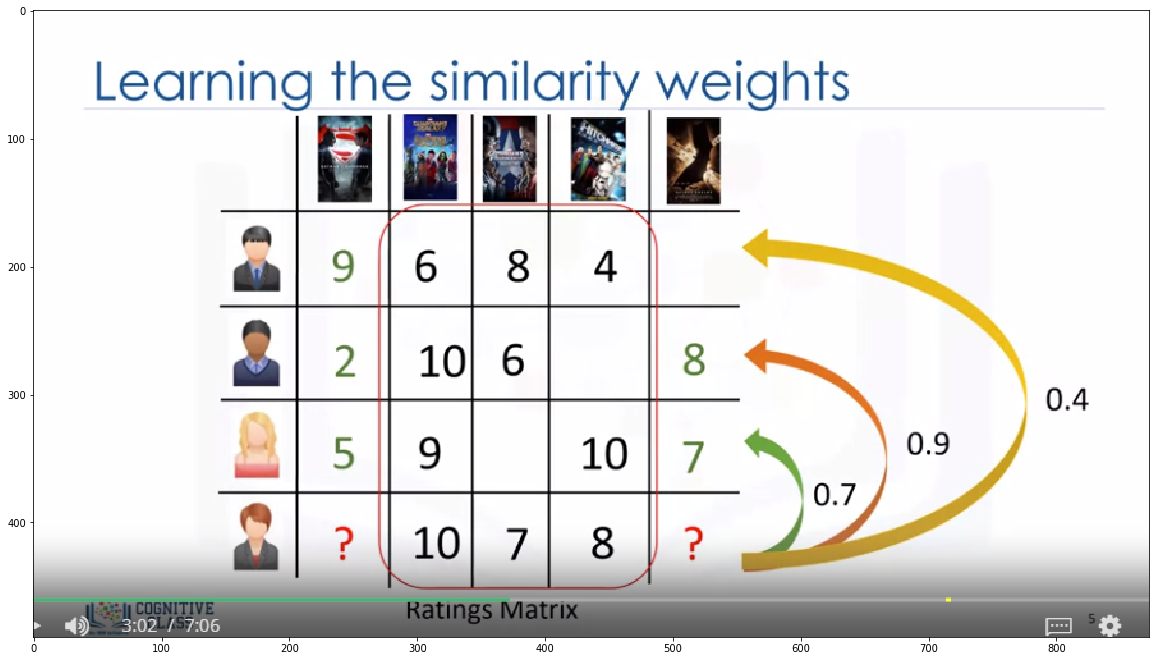

In [36]:
plt.figure(figsize=(20,12))
img = mpimg.imread('../Pictures/RatingMatrix.PNG')
plt.imshow(img)

Here we are looking at the Movies watched by a single user, And for unknown movies will recommend which one to watch. Firstly there is a need to design a metric for similarity such as Euclidean Distance or Cosine Similarity. It then multiplies those similarity indexes with the new movies list to recommend. It gives more weight to the users who are more similar.

Then we take the aggregate of the weights and see which is bigger, however firstly since some movies may be aggregated by more or less users we will first have to normalize it by dividing it by the sum of similarity index which are used in it

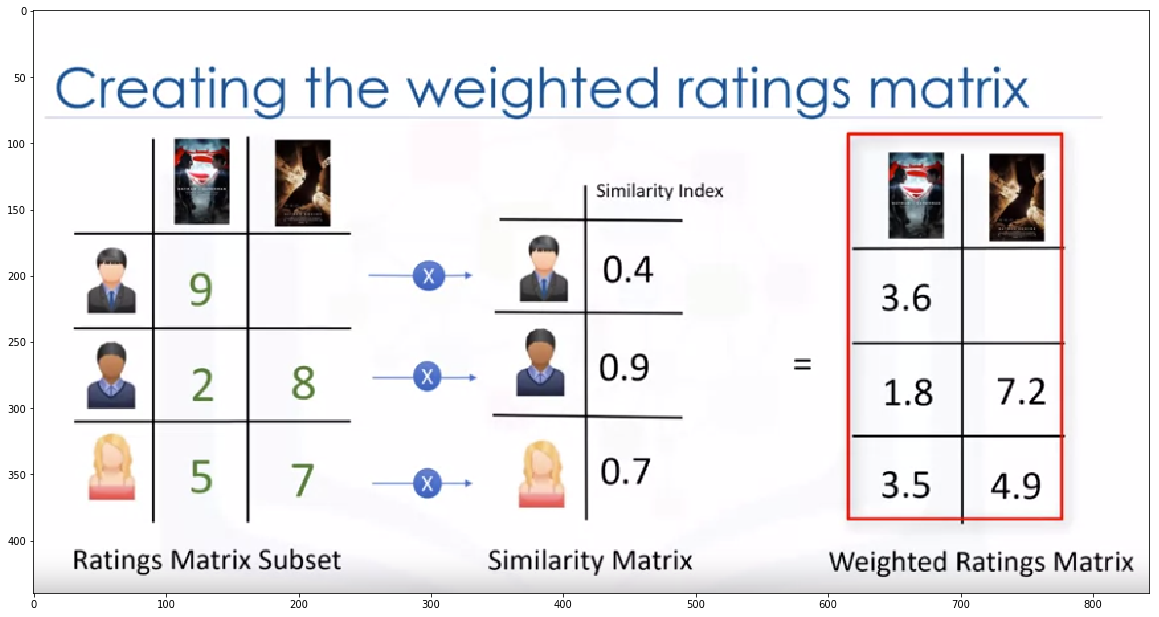

In [37]:
plt.figure(figsize=(20,12))
img = mpimg.imread('../Pictures/WeightMatrix.PNG')
plt.imshow(img)

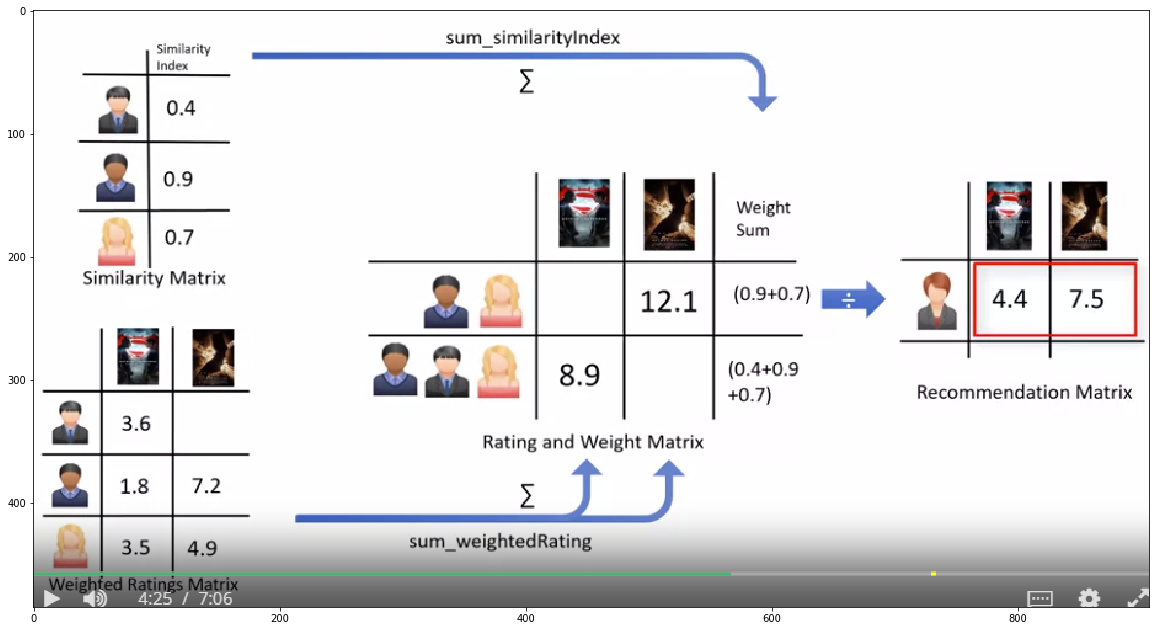

In [38]:
plt.figure(figsize=(20,12))
img = mpimg.imread('../Pictures/RMatrix.PNG')
plt.imshow(img)

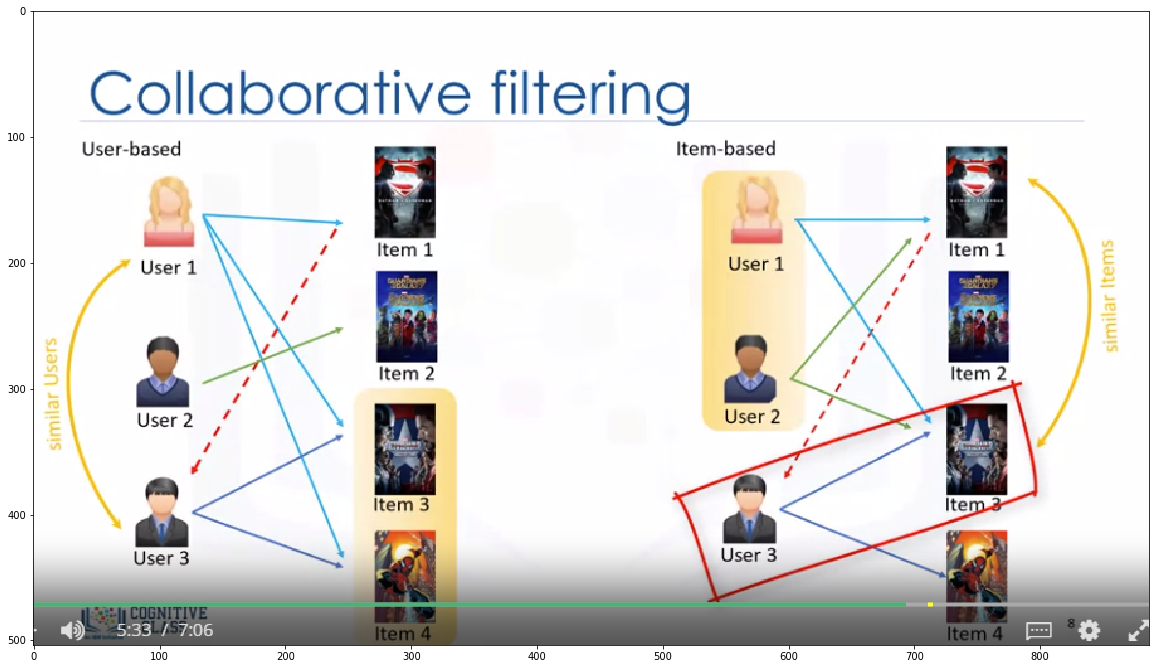

In [39]:
plt.figure(figsize=(20,12))
img = mpimg.imread('../Pictures/UserItem.PNG')
plt.imshow(img)

##### Challenges
However, there are some challenges with it as well. One of them is data sparsity. Data sparsity happens when you have a large data set of users who generally rate only a limited number of items. As mentioned, collaborative based recommenders can only predict scoring of an item if there are other users who have rated it. Due to sparsity, we might not have enough ratings in the user item dataset which makes it impossible to provide proper recommendations. Another issue to keep in mind is something called cold start. Cold start refers to the difficulty the recommendation system has when there is a new user, and as such a profile doesn't exist for them yet. Cold start can also happen when we have a new item which has not received a rating. Scalability can become an issue as well. As the number of users or items increases and the amount of data expands, collaborative filtering algorithms will begin to suffer drops in performance, simply due to growth and the similarity computation. There are some solutions for each of these challenges such as using hybrid based recommender systems

In [40]:
#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#Storing the movie information into a pandas dataframe
movies_df = pd.read_csv('./Dataset/movies.csv')
#Storing the user information into a pandas dataframe
ratings_df = pd.read_csv('./Dataset/ratings.csv')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
34203,151697,Grand Slam (1967),Thriller
34204,151701,Bloodmoney (2010),(no genres listed)
34205,151703,The Butterfly Circus (2009),Drama
34206,151709,Zero (2015),Drama|Sci-Fi


In [46]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [47]:
#Dropping the genres column
movies_df = movies_df.drop('genres', 1)
movies_df.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [48]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [49]:
#Drop removes a specified row or column from a dataframe
ratings_df = ratings_df.drop('timestamp', 1)

In [50]:
ratings_df

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0
...,...,...,...
22884372,247753,49530,5.0
22884373,247753,69481,3.0
22884374,247753,74458,4.0
22884375,247753,76093,5.0


In [51]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [52]:
#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


In [53]:
#Filtering out users that have watched movies that the input has watched and storing it
userSubset = ratings_df[ratings_df['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

,userId,movieId,rating
19,4,296,4.0
441,12,1968,3.0
479,13,2,2.0
531,13,1274,5.0
681,14,296,2.0


In [54]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['userId'])

In [55]:
userSubsetGroup.get_group(1130)

,userId,movieId,rating
104167,1130,1,0.5
104168,1130,2,4.0
104214,1130,296,4.0
104363,1130,1274,4.5
104443,1130,1968,4.5


In [57]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)
userSubsetGroup[0:3]

[(75,       userId  movieId  rating
  7507      75        1     5.0
  7508      75        2     3.5
  7540      75      296     5.0
  7633      75     1274     4.5
  7673      75     1968     5.0), (106,       userId  movieId  rating
  9083     106        1     2.5
  9084     106        2     3.0
  9115     106      296     3.5
  9198     106     1274     3.0
  9238     106     1968     3.5), (686,        userId  movieId  rating
  61336     686        1     4.0
  61337     686        2     3.0
  61377     686      296     4.0
  61478     686     1274     4.0
  61569     686     1968     5.0)]

In [58]:
userSubsetGroup = userSubsetGroup[0:100]

In [59]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0

In [60]:
pearsonCorrelationDict.items()

dict_items([(75, 0.8272781516947562), (106, 0.5860090386731182), (686, 0.8320502943378437), (815, 0.5765566601970551), (1040, 0.9434563530497265), (1130, 0.2891574659831201), (1502, 0.8770580193070299), (1599, 0.4385290096535153), (1625, 0.716114874039432), (1950, 0.179028718509858), (2065, 0.4385290096535153), (2128, 0.5860090386731196), (2432, 0.1386750490563073), (2791, 0.8770580193070299), (2839, 0.8204126541423674), (2948, -0.11720180773462392), (3025, 0.45124262819713973), (3040, 0.89514359254929), (3186, 0.6784622064861935), (3271, 0.26989594817970664), (3429, 0.0), (3734, -0.15041420939904673), (4099, 0.05860090386731196), (4208, 0.29417420270727607), (4282, -0.4385290096535115), (4292, 0.6564386345361464), (4415, -0.11183835382312353), (4586, -0.9024852563942795), (4725, -0.08006407690254357), (4818, 0.4885967564883424), (5104, 0.7674257668936507), (5165, -0.4385290096535153), (5547, 0.17200522903844556), (6082, -0.04728779924109591), (6207, 0.9615384615384616), (6366, 0.65779

In [61]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0.827278,75
1,0.586009,106
2,0.832050,686
3,0.576557,815
4,0.943456,1040


In [62]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
64,0.961678,12325
34,0.961538,6207
55,0.961538,10707
67,0.960769,13053
4,0.943456,1040


In [63]:
topUsersRating=topUsers.merge(ratings_df, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,0.961678,12325,1,3.5
1,0.961678,12325,2,1.5
2,0.961678,12325,3,3.0
3,0.961678,12325,5,0.5
4,0.961678,12325,6,2.5


In [64]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,0.961678,12325,1,3.5,3.365874
1,0.961678,12325,2,1.5,1.442517
2,0.961678,12325,3,3.0,2.885035
3,0.961678,12325,5,0.5,0.480839
4,0.961678,12325,6,2.5,2.404196


In [65]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,38.376281,140.800834
2,38.376281,96.656745
3,10.253981,27.254477
4,0.929294,2.787882
5,11.723262,27.151751


In [66]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.668955,1
2,2.518658,2
3,2.657941,3
4,3.000000,4
5,2.316058,5


In [67]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,movieId
movieId,,
5073,5.0,5073
3329,5.0,3329
2284,5.0,2284
26801,5.0,26801
6776,5.0,6776
6672,5.0,6672
3759,5.0,3759
3769,5.0,3769
3775,5.0,3775


In [68]:
movies_df.loc[movies_df['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

,movieId,title,year
2200,2284,Bandit Queen,1994
3243,3329,"Year My Voice Broke, The",1987
3669,3759,Fun and Fancy Free,1947
3679,3769,Thunderbolt and Lightfoot,1974
3685,3775,Make Mine Music,1946
4978,5073,"Son's Room, The (Stanza del figlio, La)",2001
6563,6672,War Photographer,2001
6667,6776,Lagaan: Once Upon a Time in India,2001
9064,26801,Dragon Inn (Sun lung moon hak chan),1992
18106,90531,Shame,2011


### Advantages and Disadvantages of Collaborative Filtering

##### Advantages
* Takes other user's ratings into consideration
* Doesn't need to study or extract information from the recommended item
* Adapts to the user's interests which might change over time

##### Disadvantages
* Approximation function can be slow
* There might be a low of amount of users to approximate
* Privacy issues when trying to learn the user's preferences